In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import scipy as sp
import sklearn as sk # data mining tools
import matplotlib.pylab as plt # plotting
import seaborn as sns # advanced plotting
import ast
import collections
import re 
import six
from sklearn.preprocessing import MinMaxScaler
pd.options.display.max_colwidth = 100
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('ted_main_dummy_columns.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 41 columns):
comments               2550 non-null int64
description            2550 non-null object
duration               2550 non-null int64
event                  2550 non-null object
film_date              2550 non-null int64
languages              2550 non-null int64
main_speaker           2550 non-null object
name                   2550 non-null object
num_speaker            2550 non-null int64
published_date         2550 non-null int64
ratings                2550 non-null object
related_talks          2550 non-null object
speaker_occupation     2550 non-null object
tags                   2550 non-null object
title                  2550 non-null object
url                    2550 non-null object
views                  2550 non-null int64
Literature             2550 non-null int64
Art                    2550 non-null int64
Economy_Politics       2550 non-null int64
Medicine               

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [21]:
rating_list = ['positive_ratings', 'negative_ratings', 'neutral_ratings']

In [101]:
attributes = ['duration', 'languages', 'num_speaker', 'Literature', 'Art' ,'Economy_Politics', 'Medicine',
             'Academy', 'Engineering_Science', 'Other_Occupations',
             'speaker_trend', 'tags_trend', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday',
              'funny_factor']
#attributes = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
#attributes = ['Literature', 'Art' ,'Economy_Politics', 'Medicine', 'Academy', 'Engineering_Science', 'Other_Occupations']
#attributes.append(rating_list)

In [102]:
X = df[attributes].values
y = df['popularity_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.8, 
                                                    random_state=100
                                                    ,stratify=y)

In [108]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, 
                             min_samples_split=50, min_samples_leaf=20)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Features Importance

In [109]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

Literature 0.0
Art 0.3481817210599022
Economy_Politics 0.0
Medicine 0.437802997761721
Academy 0.0
Engineering_Science 0.2140152811783769
Other_Occupations 0.0


#### Visualize the decision tree 

In [110]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [111]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Users/Pouria/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'

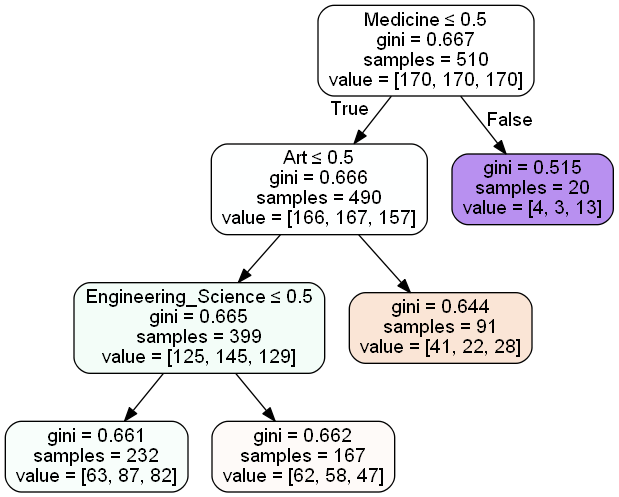

In [112]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes,   
                                filled=True, rounded=True,  
                                special_characters=True,max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [99]:
y_train_pred = clf.predict(X_train)

In [100]:
print('Precision %s' % precision_score(y_train, y_train_pred, average='micro'))
print('Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('F1-score %s' % f1_score(y_train, y_train_pred, average='micro'))

Precision 0.3803921568627451
Accuracy 0.3803921568627451
F1-score 0.3803921568627451


In [89]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.72      0.48      0.57       170
           1       0.50      0.69      0.58       170
           2       0.73      0.70      0.71       170

    accuracy                           0.62       510
   macro avg       0.65      0.62      0.62       510
weighted avg       0.65      0.62      0.62       510



In [90]:
y_test_pred = clf.predict(X_test)

In [91]:
print('Precision %s' % precision_score(y_test, y_test_pred, average='micro'))

Precision 0.546078431372549


### Cross Validation 